####  Library

In [3]:
import pandas as pd
import numpy as np
from PIL.GimpGradientFile import linear

from plotnine import *
from mizani import *

In [4]:
car_price_df = pd.read_csv('../../data/02-week/car-price.csv')

In [5]:
car_price_df.shape

(11914, 16)

In [6]:
car_price_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
car_price_df.columns = car_price_df.columns.str.lower().str.replace(' ', '_')

string_columns = list(car_price_df.dtypes[car_price_df.dtypes == 'object'].index)

for col in string_columns:
    car_price_df[col] = car_price_df[col].str.lower().str.replace(' ', '_')

In [8]:
car_price_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory data analysis

In [9]:
for col in car_price_df.columns:
    print(col)
    print(car_price_df[col].unique()[:5])
    print(car_price_df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

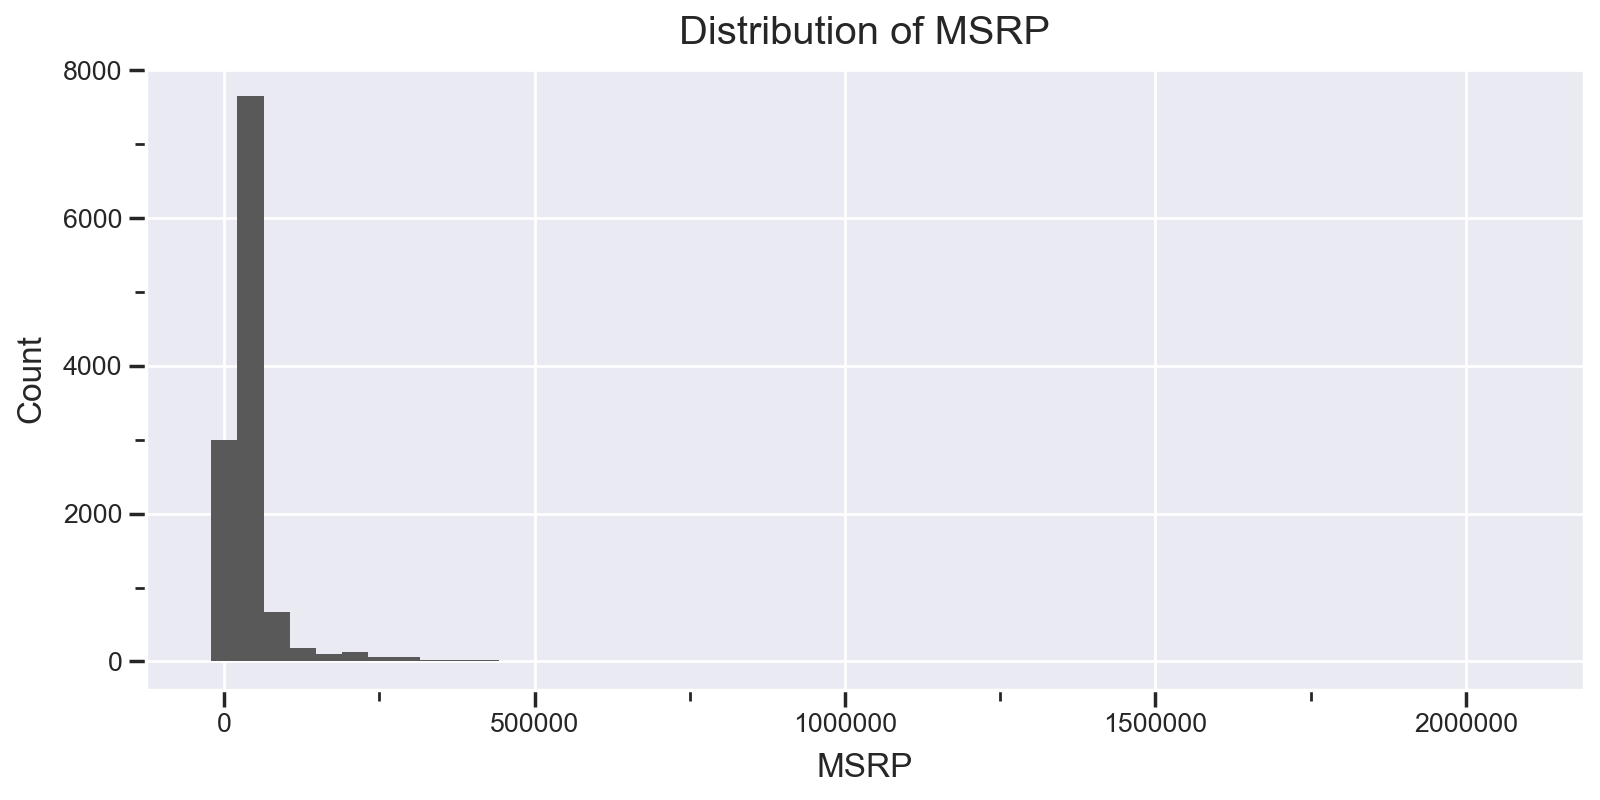

In [10]:
(
 ggplot(car_price_df,aes(x = 'msrp'))
    + geom_histogram(bins=50)
    + labs(
        x = 'MSRP',
        y = 'Count',
        title = 'Distribution of MSRP'
)
 + theme_seaborn()
 + theme(figure_size=(8,4))

)

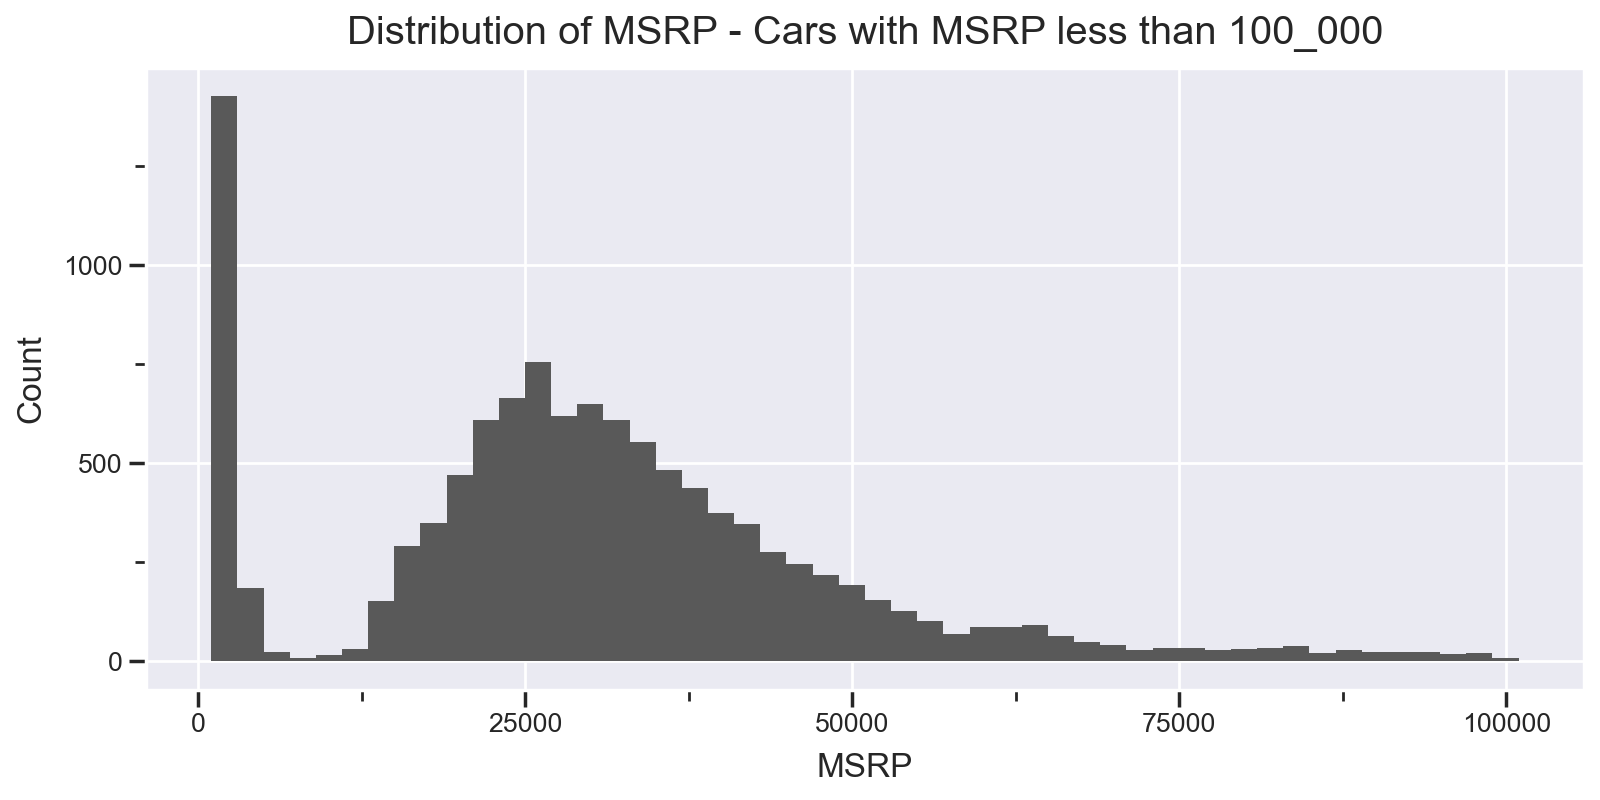

In [11]:
(
 ggplot(car_price_df\
        .query("msrp<100000"),aes(x = 'msrp'))
    + geom_histogram(bins=50)
    + labs(
        x = 'MSRP',
        y = 'Count',
        title = 'Distribution of MSRP - Cars with MSRP less than 100_000',
)
 + theme_seaborn()
 + theme(figure_size=(8,4))

)

Log Transformation
- Applying log transformation to supress long tail distribution

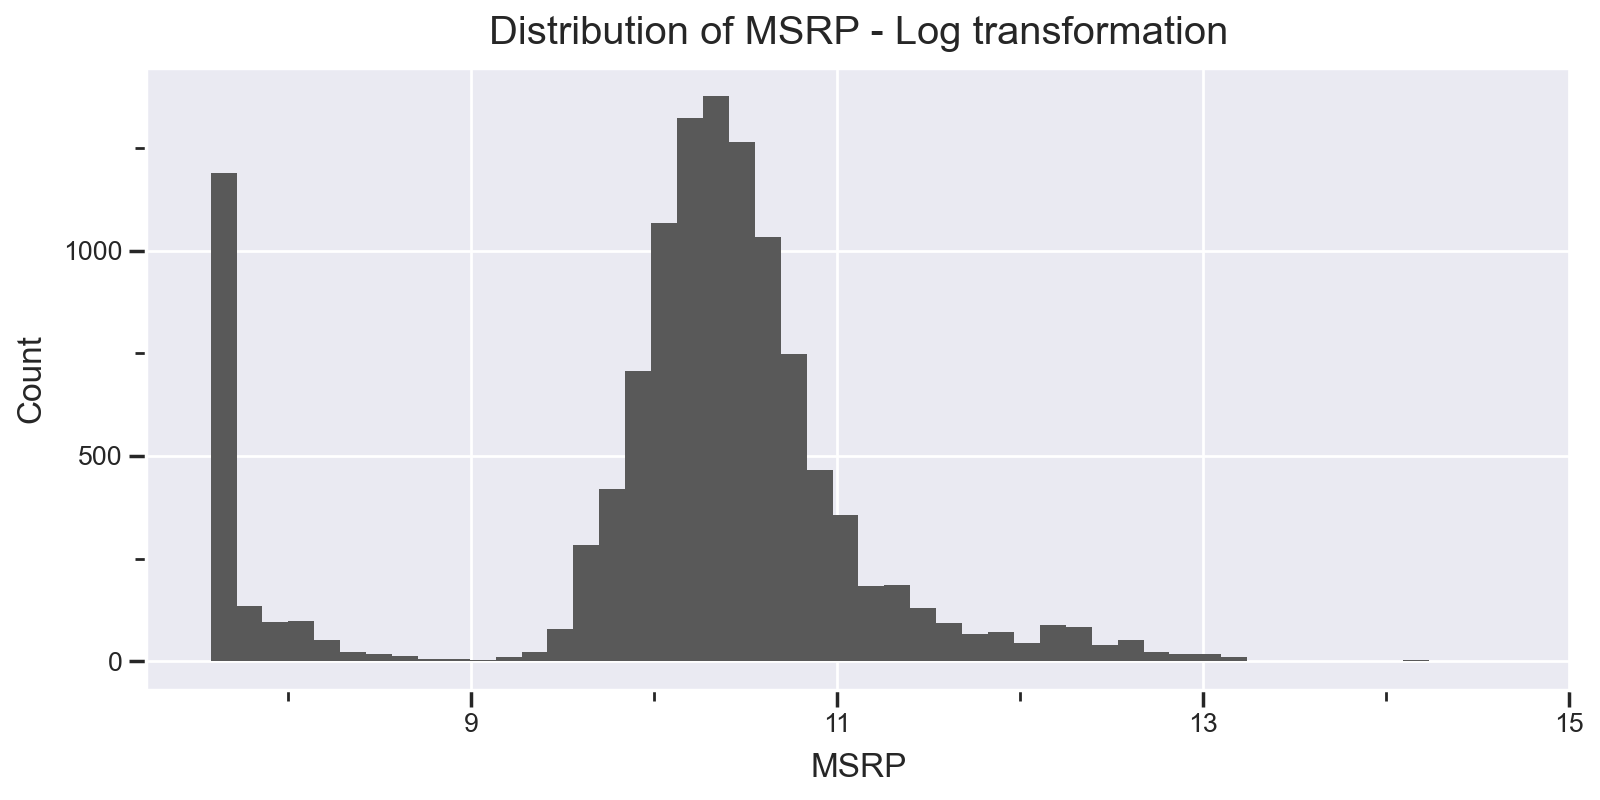

In [12]:
(
        ggplot(car_price_df\
               .assign(price_logs10= lambda x:np.log1p(x['msrp'])),
               aes(x = 'price_logs10')
               )
    + geom_histogram(bins=50)
    + labs(
        x = 'MSRP',
        y = 'Count',
        title = 'Distribution of MSRP - Log transformation',
)
 + theme_seaborn()
 + theme(figure_size=(8,4))

)

### Missing values

In [13]:
car_price_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up validation setup

In [14]:
np.random.seed(2)

n = len(car_price_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [15]:
idx = np.arange(n)
np.random.shuffle(idx)

In [75]:
car_price_df_shuffled = car_price_df.iloc[idx]

df_train = car_price_df_shuffled.iloc[:n_train].copy()
df_val = car_price_df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = car_price_df_shuffled.iloc[n_train+n_val:].copy()
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(7150, 16)
(2382, 16)
(2382, 16)


In [76]:
y_train =  np.log1p(df_train.msrp.values)
y_test =  np.log1p(df_test.msrp.values)
y_val =  np.log1p(df_val.msrp.values)


In [77]:
df_train.drop('msrp',inplace=True,axis=1)
df_test.drop('msrp',inplace=True,axis=1)
df_val.drop('msrp',inplace=True,axis=1)


### Linear Regression (Bare Bone)

In [19]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
xi = [453,11,86]

In [20]:
def linear_regression(xi:list)-> int:
    
    n = len(xi)
    
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [21]:
linear_regression(xi)

12.312

In [22]:
np.exp(12.312)

222348.2221101062

### Linear Regression (Vector form)

In [23]:
w_new = [w0] + w
print(w_new)

[7.17, 0.01, 0.04, 0.002]


In [24]:
def dot_product(xi,wi):
    n = len(xi)
    res = 0 
    for j in range(n):
        res = res + xi[j] * wi[j]
    return res

In [25]:
def linear_regression(xi):
    xi = [1] + xi
    return dot_product(xi,w_new)

In [26]:
linear_regression(xi)

12.312

In [27]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]

In [28]:
x = [x1,x2,x3]
X = np.array(x)

In [29]:
def linear_regression(X,w):
    return X.dot(w_new)

In [30]:
linear_regression(X,w_new)

array([12.38 , 13.552, 12.312])

### Lienar Regression Normal

In [31]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

### Car Predictions model

In [35]:
car_price_df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [36]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [37]:
df_train = df_train[base].fillna(0)

In [38]:
X_train = df_train[base].values

In [39]:
train_linear_regression(X_train,y_train)

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [40]:
w_0, w = train_linear_regression(X_train, y_train)

In [41]:
y_pred = w_0 + X_train.dot(w)

In [42]:
chart_compare_df = pd.DataFrame(dict(y_pred=y_pred,
                                     y_train = y_train))

chart_compare_df = chart_compare_df.melt(value_vars=['y_pred','y_train'],
                      )

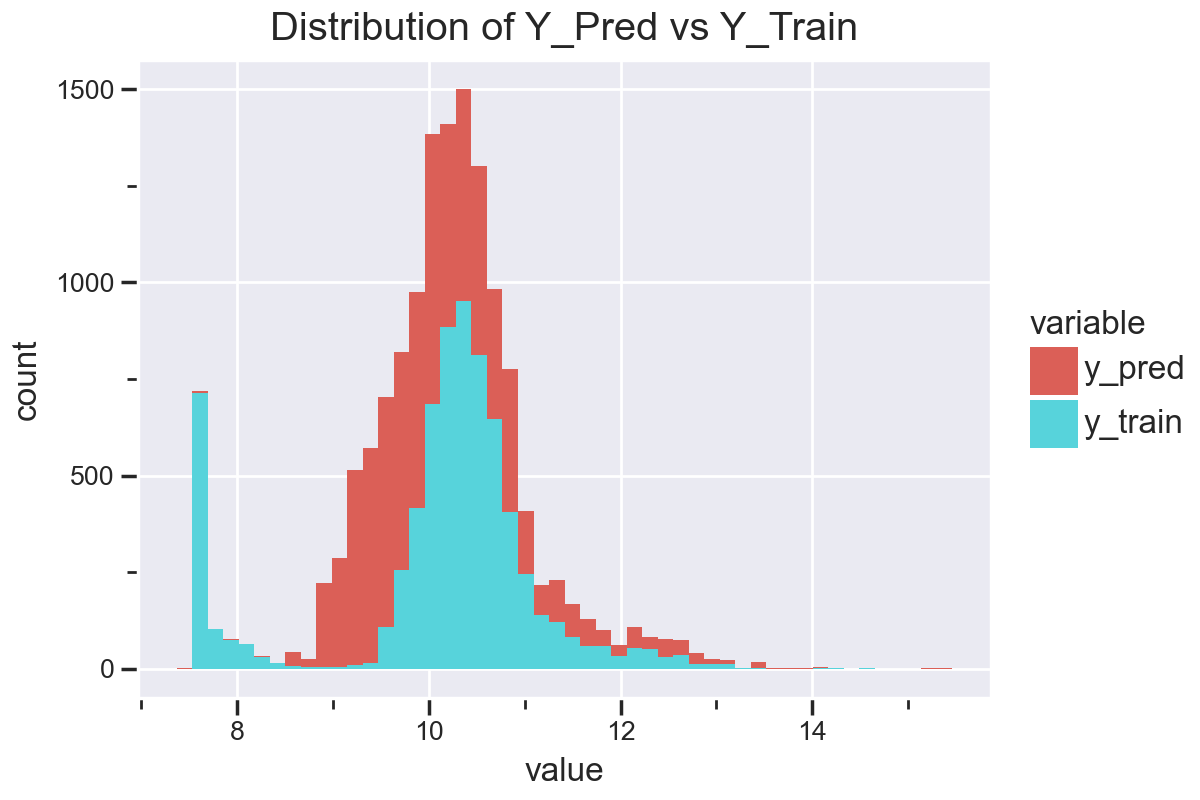

In [43]:
(
        ggplot(chart_compare_df,aes(x = 'value', fill='variable')) 
    + geom_histogram(bins = 50)
    + labs(
        title = 'Distribution of Y_Pred vs Y_Train',
)
 + theme_seaborn()
 + theme(figure_size=(6,4))
)

### RMSE

In [44]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [45]:
rmse(y_train,y_pred)

0.7554192603920132

#### Validating the model

In [59]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

df_train = df_train[base].fillna(0)

X_train = df_train[base].values

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

In [68]:
def prepare_x(df:pd.DataFrame) -> np.array:
    df_num = df[base]
    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [69]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression(X_train, y_train)


In [70]:
X_val = prepare_x(df_val)

In [71]:
y_pred = w_0 + X_val.dot(w)

In [72]:
rmse(y_pred,y_val)

0.761653099130156

### Simple Feature engineering 

In [78]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [79]:
def prepare_x(df:pd.DataFrame) -> np.array:
    df = df.copy() ## Will not modify the original dataframe
    
    df['age'] = 2024 - df.year
    features = base + ['age']
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [80]:
X_train = prepare_x(df_train)

In [83]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)

y_pred = w_0 + X_val.dot(w)
rmse(y_pred,y_val)

0.5172055461058345

In [86]:
chart_compare_df = pd.DataFrame(dict(y_pred=y_pred,
                                     y_train = y_val))


chart_compare_df = chart_compare_df.melt(value_vars=['y_pred','y_train'],
                      )

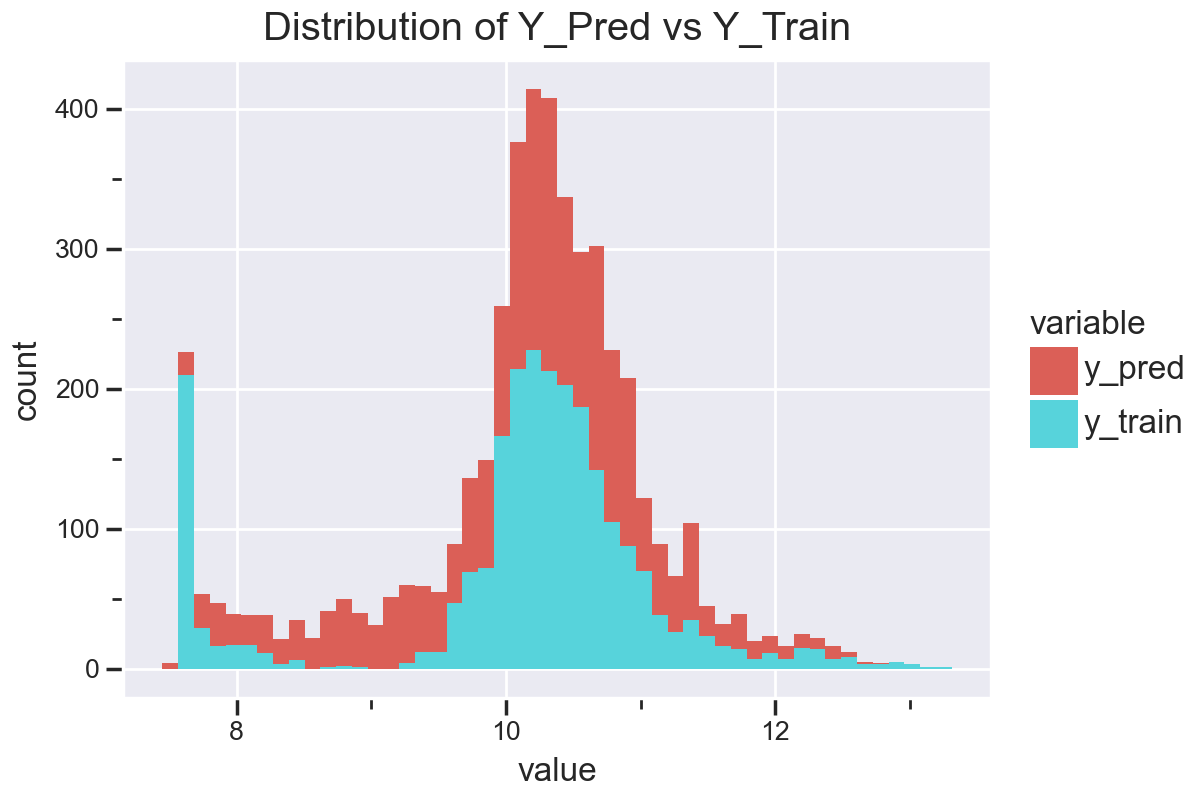

In [87]:
(
        ggplot(chart_compare_df,aes(x = 'value', fill='variable')) 
    + geom_histogram(bins = 50)
    + labs(
        title = 'Distribution of Y_Pred vs Y_Train',
)
 + theme_seaborn()
 + theme(figure_size=(6,4))
)

### Categorial variables

In [89]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [91]:
for val in [2,3,4]:
    df_train['num_door_%s'%val] = (df_train.number_of_doors==val).astype(int)

In [95]:
def prepare_x(df:pd.DataFrame) -> np.array:
    df = df.copy() ## Will not modify the original dataframe
    
    df['age'] = 2024 - df.year
    features = base + ['age']

    for val in [2,3,4]:
        df['num_door_%s'%val] = (df.number_of_doors==val).astype(int)
        features.append('num_door_%s'%val)
        
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [96]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)

y_pred = w_0 + X_val.dot(w)
rmse(y_pred,y_val)

0.5157995641503376

In [102]:
list(df_train.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [105]:
## 
categories = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style']

In [108]:
categories_dict = dict()

for c_val in categories: 
    categories_dict[c_val] = list(car_price_df[c_val].value_counts().head().index)

In [126]:
def prepare_x(df:pd.DataFrame) -> np.array:
    df = df.copy() ## Will not modify the original dataframe
    
    df['age'] = 2024 - df.year
    features = base + ['age']

    for val in [2,3,4]:
        df['num_door_%s'%val] = (df.number_of_doors==val).astype(int)
        features.append('num_door_%s'%val)
        
    for key,values in categories_dict.items():
        for val in values: 
            df['%s_%s' %(key,val)] = (df[key]==val).astype(int)
            features.append('%s_%s'%(key,val))
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [127]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)

y_pred = w_0 + X_val.dot(w)
rmse(y_pred,y_val)

56.44801852178058

### Regularization 

In [128]:
def train_linear_regression_reg(X, y,r = 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

### Car Predictions model

In [129]:
X_train = prepare_x(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

X_val = prepare_x(df_val)

y_pred = w_0 + X_val.dot(w)
rmse(y_pred, y_val)

0.4565226787180822


### tuning the model 

In [130]:

for r in [0,0.00001,0.0001,0.0010,0.1,1,10]:
   X_train = prepare_x(df_train)
   w_0, w = train_linear_regression_reg(X_train, y_train,r=r)
   X_val = prepare_x(df_val)
   y_pred = w_0 + X_val.dot(w)
   print(r)
   print(rmse(y_pred, y_val)) 

0
56.44801852178058
1e-05
0.45651705090064265
0.0001
0.4565170707061041
0.001
0.45651757759207945
0.1
0.4565765542271998
1
0.4573238525905183
10
0.47216539211223707


### Using the model 

In [131]:
df_full_train = pd.concat([df_train,df_val],ignore_index=False)

In [132]:
X_full_train = prepare_x(df_full_train)

In [134]:
y_full_train = np.concatenate([y_train,y_val])

In [135]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.001)


In [137]:
w_0,w

(6.702315167358845,
 array([ 1.52507849e-03,  1.18188582e-01, -6.66091027e-03, -5.33401091e-03,
        -4.87601470e-05, -9.69089026e-02, -7.92556528e-01, -8.90796549e-01,
        -6.35035382e-01, -4.14339262e-02,  1.75560165e-01, -5.77252841e-04,
        -1.00563620e-01, -9.27552200e-02, -4.66854519e-01,  7.98706012e-02,
        -3.16042334e-01, -5.51976508e-01, -7.89487933e-02,  1.17125273e+00,
         9.95944448e-01,  1.22552177e+00,  2.72864933e+00,  5.85876379e-01,
         1.72453327e+00,  1.62523763e+00,  1.71241677e+00,  1.64041631e+00,
        -9.70552629e-02,  3.73069897e-02, -5.81772856e-02, -2.35944859e-02,
        -1.19354604e-02,  2.31573342e+00,  2.20136336e+00,  2.18594770e+00,
        -5.00807708e-02,  5.62185949e-02,  1.84794079e-01,  3.32646714e-01,
        -1.58818022e-01]))

In [138]:
X_test = prepare_x(df_test)

y_pred = w_0 + X_test.dot(w)
rmse(y_pred, y_test)

0.4517749549731481